<a href="https://colab.research.google.com/github/miguelArboleda28/inteligenciaArtificial-II/blob/main/Perceptron_I_A_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

#Importamos las librerias  y módulos;
#panda y numpy para tratado de datos ambos para el analisis de datos
#matplotlib para las gráficas

In [16]:
df_l2 = pd.read_csv('/content/bmi.csv')
df_l2 = df_l2.rename(columns={'Index': 'IMC'})
print(df_l2)
#Leemos los datos con pd.read_csv
#Para entendimiento de lectura renombramos la columna 'index' a 'IMC'

     Gender  Height  Weight  IMC
0      Male     174      96    4
1      Male     189      87    2
2    Female     185     110    4
3    Female     195     104    3
4      Male     149      61    3
..      ...     ...     ...  ...
495  Female     150     153    5
496  Female     184     121    4
497  Female     141     136    5
498    Male     150      95    5
499    Male     173     131    5

[500 rows x 4 columns]


**EL IMC ES FLOAT**

In [7]:
df_l2['IMC'] = (df_l2['Weight']//((df_l2['Height']/100)**2))
df_l2[['IMC']] = df_l2[['IMC']].astype(int)
print (df_l2)
#Calculamos el 'IMC' para cada peso y altura
#Ya que el IMC es un valor flotante(float) utilizamos astype() para cambiar el
#tipo de dato, lo pasaremos a entero para fácilidad del aprendizaje

     Gender  Height  Weight  IMC
0      Male     174      96   31
1      Male     189      87   24
2    Female     185     110   32
3    Female     195     104   27
4      Male     149      61   27
..      ...     ...     ...  ...
495  Female     150     153   68
496  Female     184     121   35
497  Female     141     136   68
498    Male     150      95   42
499    Male     173     131   43

[500 rows x 4 columns]


**2 a** - > La media de la altura es 170cm, su punto máximo es 200cm y su valor mínimo es aproximadamente 155cm, como la caja esta bien centralizada y su media también se pude concluir que la relación de los datos es la adecuada.
La media del peso es aproximadamente 113kg, su punto máximo es aproximadamente 160kg y su valor mínimo es menor que 60kg pero mayor que 1, se puede concluir lo mismo que la altura, la relación de los datos es la adecuada para su estudio.
La media del IMC es 35, su punto máximo es aproximadamente 75 y su valor mínimo es menor 12, se concluye que su caja es asimétrica hacia la parte inferior lo cual indica que los datos pueden no estar distribuidos normalmente y también encontramos valores atípicos estos probablemente son datos que se han medido mal y por tanto no deberían tenerse en cuenta en su estudio.

**CUAL ES CUAL? PORQUE NO LE PUSIERON NOMBRES?**

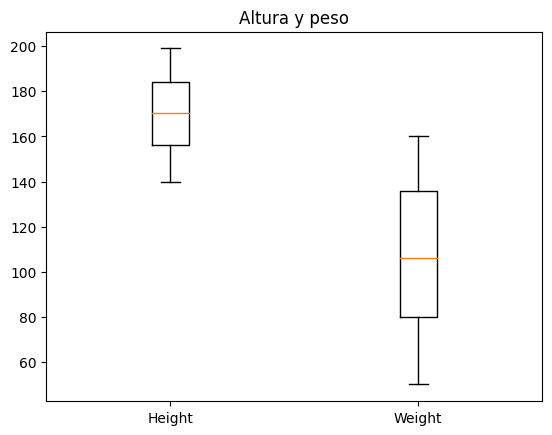

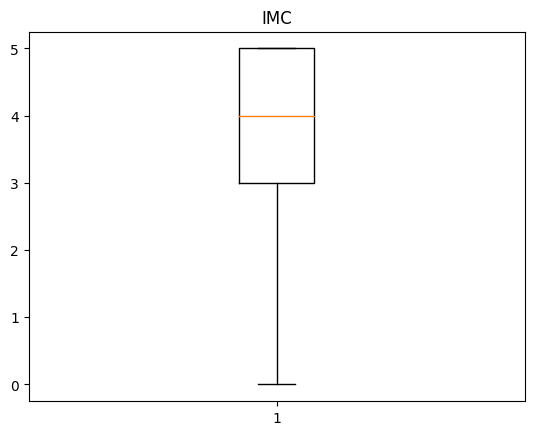

In [20]:
a = [df_l2 ['Height'], df_l2['Weight']]
#Se crea una lista 'a' que contiene las columnas 'height' y 'weight'
plt.boxplot(a)
#Se utiliza boxplot() para explorar los datos de 'a' en un diagrama de caja;
#separando los datos en quartil uno, media(la raya que traza la caja) y quartil dos,
#identificamos la dispersion y simetria de los datos. Comparamos las dos columnas
plt.title("Altura y peso")
label_a = ['Height', 'Weight']
plt.xticks([1,2], label_a)
plt.show()
#Damos titulo, creamos una etiqueta para nombrar cada caja y mostramos
b = df_l2 ['IMC']
plt.boxplot(b)
plt.title("IMC")
plt.show()
#Creamos el diagrama de caja para analizar los datos dispersos, simetricos y distribución del IMC
#de acuerdo a los datos de la columna

**2 b**

-> En el caso de Peso Vs Altura, se observa que no hay un patrón de comportamiento especial en los puntos; a simple vista no se visualiza qué efecto produce la variable independiente sobre la dependiente, por lo que no hay correlación en los datos.

-> Para el caso IMC Vs Peso, en esta la distribución de los puntos hace pensar que podemos trazar una línea recta que pase aproximadamente a la misma distancia de la mayoría de los puntos. Por lo que podemos decir que es una correlación lineal posititva, lo que se traduce en que a mayor IMC el peso se incrementa.

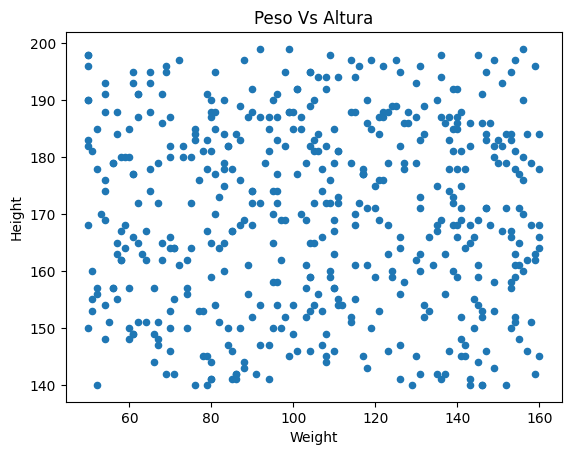

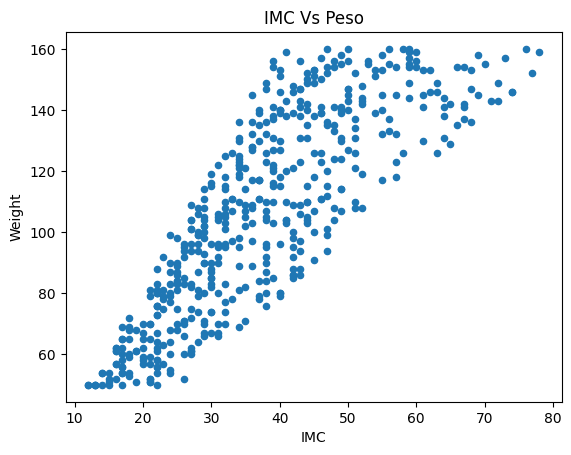

In [9]:
df_l2.plot.scatter(x = "Weight", y = "Height", alpha = 1)
plt.title("Peso Vs Altura")
plt.show()
#Se analizará, además del diagrama de caja, el comportamiento en un
#diagrama de disperson con plot.scatter() con la visibilidad(alpha = 1) en todos los puntos
#peso vs altura
df_l2.plot.scatter(x = "IMC", y = "Weight", alpha = 1)
plt.title("IMC Vs Peso")
plt.show()
#Se compara con el giagrama de disperson IMC vs Perso con el plot.scatter()
#y las columnas de df_12 'IMC' y 'Weight'

3a

Text(0, 0.5, 'y (Target) : IMC')

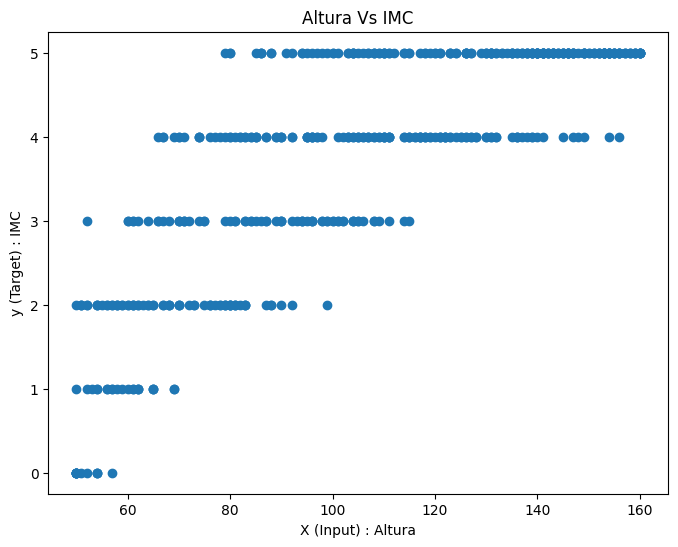

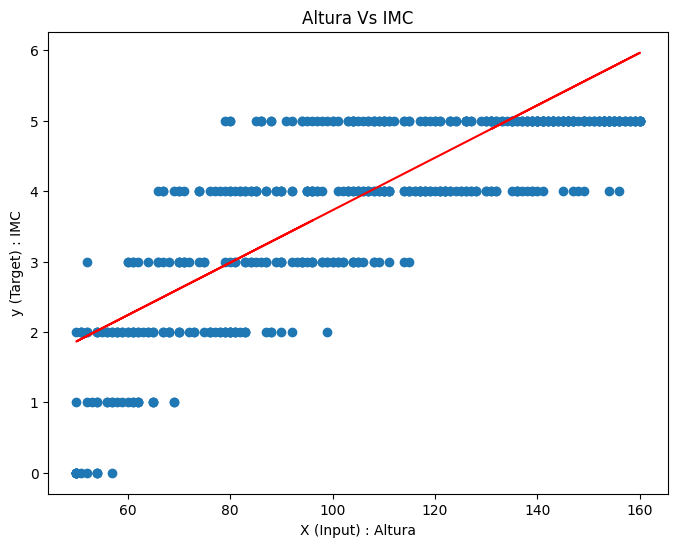

In [28]:
X = np.array(df_l2['Weight']).reshape (-1,1)
y = np.array(df_l2['IMC'])
#Como para X y Y para las columnas se utiliza np.array() para volver la serie de numeros
#en un arreglo unidimensional y con .reshape(-1,1) le damos que -1 para la fila dinamica de acuerdo
#a la cantidad de datos y 1 para decir que es una sola columna.
plt.figure(figsize = (8,6))
plt.scatter(X,y)
plt.title('Altura Vs IMC')
plt.xlabel('X (Input) : Altura')
plt.ylabel('y (Target) : IMC')
#Creamos una visualización plt.figure() para preparar los datos a graficar
#Se crea lo necesario para el entendimiento como el titulo(plt.title), las etiquetas en x(plt.xlabel) y
#para Y (plt.ylabel())

#Se crea una funcion de entrenamiento para el estudio del IMC, peso, etc. en la cual la entrada de datos
#como parametros de la función serán X,y y epochs
def training(X, y, epochs):
    m, n = X.shape # shape para obtener el número de datos de del arreglo
    lr=0.0001 #la tasa de aprendizaje pequeña para los pasos para reducir el error
    weights = np.zeros((n,1))#Un arreglo de ceros(np.zeros()) con n filas y 1 columna
    bias = 0 #sesgo en 0 para reducir el error en los datos reales con los datos que se predijeron

    y = y.reshape(m,1)

    losses = [] #Lista para guardar los valores de pérdida durante el entrenamiento


    for epoch in range(epochs): #Se especifica el número de epocas de entrenamiento
        y_hat = np.dot(X, weights) + bias #Producto punto(np.dot()) entre matrices X y weights
        loss = np.mean((y_hat - y)**2)#Se calcula el error cuadrado medio, entre la prediccion y_hat y datos reales Y
        losses.append(loss)#agregamos los datos de loss a la lista para realizar seguimiento
        dw = (1/m)*np.dot(X.T, (y_hat - y))# se calcula el gradiente de los pesos(dw)
        #multiplicando la matriz transpuesta por el producto punto de X.T ´pr la diferencia de prediccion(y_hat)
        #y los reales(Y). Indicamos la direccion en la que se debe ajustarse los pesos para reducir la perdida
        db = (1/m)*np.sum((y_hat - y))#Calculamos el gradiente del sesgo, como el promedio de las diferencias entre y_hat-Y
        #utilizando np.sum()
        weights -= lr*dw
        bias -= lr*db
        #Actualiza los pesos y el sesgo utilizando el descenso de gradiente.
        #Se resta el producto de la tasa de aprendizaje (lr) y
        #los gradientes (dw para los pesos y db para el sesgo) de los valores anteriores.
    return weights, bias, losses
# la función training realiza el entrenamiento iterativo de un modelo de regresión lineal
#utilizando el descenso de gradiente. En cada iteración (epoch), calcula las predicciones del modelo,
#el error cuadrado medio, los gradientes de los pesos y el sesgo, y actualiza los parámetros del modelo
#utilizando una tasa de aprendizaje (lr). Al final del entrenamiento, devuelve los pesos y el sesgo entrenados,
#junto con una lista que contiene las pérdidas calculadas en cada iteración.

def predict(X, weights, bias):
      return np.dot(X, weights) + bias

X_train, X_test, y_train, y_test = X[:25], X[25:], y[:25], y[25:]
w, b, l  = training(X_train, y_train, epochs=100)
#Aqui la función  predict que toma tres argumentos: X (matriz de características),
#weights (pesos del modelo) y bias (sesgo del modelo).
#La función calcula y devuelve las predicciones del modelo multiplicando la matriz X por weights y
#sumando el sesgo utilizando la función np.dot() qeue es el producto punto.

plt.figure(figsize = (8,6))
plt.scatter(X,y)
plt.plot(X, predict(X, w, b), color='red')
plt.title('Altura Vs IMC')
plt.xlabel('X (Input) : Altura')
plt.ylabel('y (Target) : IMC')
# crea un gráfico que muestra los datos de entrada (altura)
#en forma de puntos dispersos y la línea de regresión lineal generada por el modelo entrenado en color rojo.
#El gráfico permite visualizar cómo el modelo de regresión lineal se ajusta a los datos y
#cómo se relacionan la altura y el IMC.


In [27]:
y_test_preds = predict(X_test, w, b)#Utiliza la función predict para hacer
#predicciones en los datos de prueba X_test utilizando los pesos w y el sesgo b
#que se obtuvieron después del entrenamiento.
compare = pd.DataFrame({'Actual':y_test, 'Predicted':list(y_test_preds)})
#Se crea un dataFrame(pd.DataFrame()) que contiene dos columnas: "Actual"
#(valores reales de y_test) y "Predicted" (predicciones de y_test_preds).
print(compare)
print(np.mean(y_test-y_test_preds)**2)#Imprime el error cuadrado medio
#Aquí se calcula las predicciones del modelo en los datos de prueba,
#crea un DataFrame para comparar los valores reales y las predicciones,
#y calcula e imprime el error cuadrado medio para evaluar cuán bien
#el modelo se ajusta a los datos de prueba.

     Actual             Predicted
0         3  [2.3865713149816496]
1         3   [3.542357506659355]
2         1  [2.3120044639056685]
3         5   [5.928496741090746]
4         5   [5.667512762324813]
..      ...                   ...
470       5  [5.7047961878628035]
471       4   [4.511726570647108]
472       5   [5.070977953716965]
473       5   [3.542357506659355]
474       5   [4.884560826027013]

[475 rows x 2 columns]
0.04652178927309199


3 b

Text(0, 0.5, 'y (Target) : IMC')

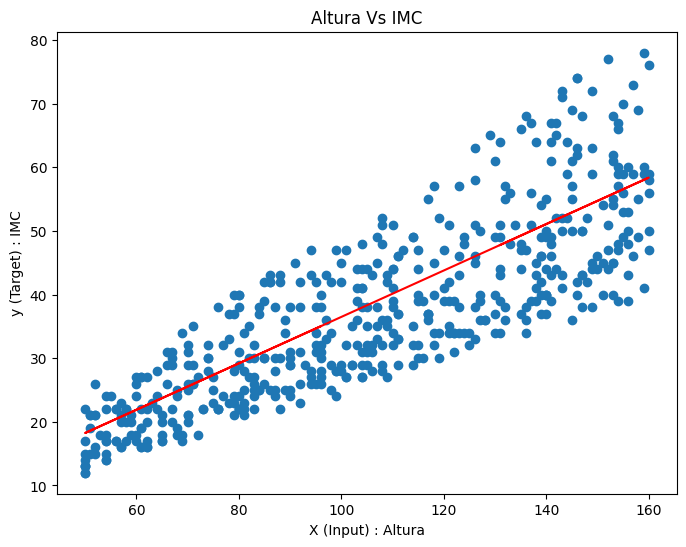

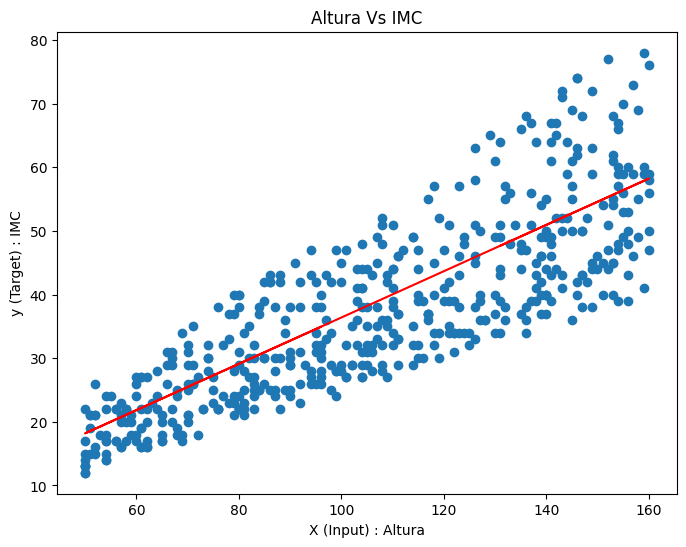

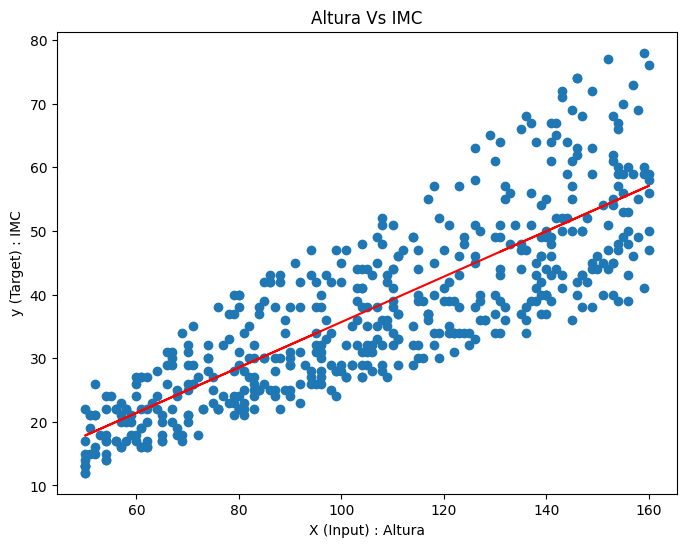

In [13]:
X_train, X_test, y_train, y_test = X[:25], X[25:], y[:25], y[25:]
w, b, l  = training(X_train, y_train, epochs=100)
#Aquí estamos dividiendo tus datos X y y en cuatro conjuntos: X_train, X_test, y_train y y_test

plt.figure(figsize = (8,6))#establece una figura
plt.scatter(X,y)#Grafico de dispercion, X es el conjunto de características (por ejemplo, la altura)
#y y es el conjunto de valores objetivo (por ejemplo, el IMC).
plt.plot(X, predict(X, w, b), color='red')#Crea una línea de trazado que representa
#las predicciones del modelo sobre los datos de entrada X.
plt.title('Altura Vs IMC')#Titulo
plt.xlabel('X (Input) : Altura')#Etiquetas para X
plt.ylabel('y (Target) : IMC')#Etiquetas para Y

X_train, X_test, y_train, y_test = X[:35], X[15:], y[:35], y[15:]
w, b, l  = training(X_train, y_train, epochs=100)

plt.figure(figsize = (8,6))
plt.scatter(X,y)
plt.plot(X, predict(X, w, b), color='red')
plt.title('Altura Vs IMC')
plt.xlabel('X (Input) : Altura')
plt.ylabel('y (Target) : IMC')

X_train, X_test, y_train, y_test = X[:45], X[5:], y[:45], y[5:]
w, b, l  = training(X_train, y_train, epochs=100)

plt.figure(figsize = (8,6))
plt.scatter(X,y)
plt.plot(X, predict(X, w, b), color='red')
plt.title('Altura Vs IMC')
plt.xlabel('X (Input) : Altura')
plt.ylabel('y (Target) : IMC')

#Ya que se repite las figuras, pero no los datos de entrada , se reume que aqui se realiza
#iteraciones de entrenamiento y visualización para un modelo de regresión lineal,
#incrementando gradualmente el tamaño del conjunto de entrenamiento en cada iteración.
#El propósito podría ser observar cómo el rendimiento del modelo cambia a medida que se ajusta a más datos de entrenamiento.

**ERAN TRES MODELOS EN LA MISMA GRAFICA**

**4 a** -> Lo primero que se debe hacer es agregar la segunda variable en nuestra X,**(UN SEGUNDO PESO)** dandole a entender al algoritmo que trabajaremos con dos variables en vez de una; luego quitariamos el reshape ya que en este caso no se necesita y modificariamos el lr para que el numero de saltos entre cada iteracion sea, en este caso, mas pequeño y asi dar predicciones mas exactas y un numero de error menor **¿POR QUE CAMBIAR?**.

**4 b** -> En caunto a los pesos y el bias, el cambio y/o actualizacion mas grande se veria en los pesos, ya que no se tendria uno solo, sino dos, entonces ya no tendriamos en cuenta la formula h(x)=Wx+b, usariamos W0Xo+W1X1+.....+b segun las variables que usemos, por ende ambos deben actualizarse simultaneamente. En cuanto al bias este sigue igual porque solo hay uno. **¿COMO SE ACTUALIZAN?**

In [30]:
X = np.array(df_l2[['Weight', 'Height']])
y = np.array(df_l2['IMC'])

def training(X, y, epochs):
    m, n = X.shape
    lr=0.000001
    weights = np.zeros((n,1))
    bias = 0

    y = y.reshape(m,1)

    losses = []

    for epoch in range(epochs):
        y_hat = np.dot(X, weights) + bias
        loss = np.mean((y_hat - y)**2)
        losses.append(loss)
        dw = (1/m)*np.dot(X.T, (y_hat - y))
        db = (1/m)*np.sum((y_hat - y))
        weights -= lr*dw
        bias -= lr*db
    return weights, bias, losses

def predict(X, weights, bias):
      return np.dot(X, weights) + bias

X_train, X_test, y_train, y_test = X[:25], X[25:], y[:25], y[25:]
w, b, l  = training(X_train, y_train, epochs=100)

#continúa con el proceso de entrenamiento y predicción, utilizando las mismas características "Weight"
#y "Height" para predecir el valor de "IMC".
#El modelo se entrena utilizando el algoritmo de descenso de gradiente y se generan las predicciones del modelo
#en los datos de prueba. El rendimiento del modelo se evaluará en función de las pérdidas calculadas durante el entrenamiento.
#En resumen, se disminuye la tasa de aprendizaje y los parametros de entrada para el entrenaimento y predicción para observar
#como cambian o se mantienen los datos...X_train, X_test, y_train, y_test = X[:25], X[25:], y[:25], y[25:]

In [15]:
y_test_preds = predict(X_test, w, b)
compare = pd.DataFrame({'Actual':y_test, 'Predicted':list(y_test_preds)})
print(compare)
print(np.mean(y_test-y_test_preds)**2)

     Actual             Predicted
0        28  [28.713379068912648]
1        26  [37.841528202265195]
2        17  [33.516444658989734]
3        59   [41.63526181894552]
4        47   [43.04678998429871]
..      ...                   ...
470      68   [39.10533704926851]
471      35   [40.07832141091281]
472      68   [35.83368146516257]
473      42  [32.241818602295524]
474      43   [39.72176652039925]

[475 rows x 2 columns]
0.8413580603147828
